In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import glob
import os
from bs4 import BeautifulSoup as bs
import requests
import re

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose

## Paris

In [2]:
raw_df_12_14_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_12_14_2020.csv')
print(f"The 12_14_2020 dataset contains {len(raw_df_12_14_2020)} AirBnb listings; the avg price is ${round(raw_df_12_14_2020['price'].mean(),2)}.")

raw_df_01_10_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_01_10_2021.csv')
print(f"The dataset contains {len(raw_df_01_10_2021)} AirBnb listings.")

raw_df_02_08_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_02_08_2021.csv')
print(f"The dataset contains {len(raw_df_02_08_2021)} AirBnb listings.")

raw_df_03_04_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_03_04_2021.csv')
print(f"The dataset contains {len(raw_df_03_04_2021)} AirBnb listings.")

raw_df_04_10_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_04_10_2021.csv')
print(f"The dataset contains {len(raw_df_04_10_2021)} AirBnb listings.")

raw_df_06_07_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_06_07_2021.csv')
print(f"The 06_07_2021 dataset contains {len(raw_df_06_07_2021)} AirBnb listings; the avg price is ${round(raw_df_06_07_2021['price'].mean(),2)}.")


The 12_14_2020 dataset contains 65917 AirBnb listings; the avg price is $114.28.
The dataset contains 65256 AirBnb listings.
The dataset contains 64690 AirBnb listings.
The dataset contains 64347 AirBnb listings.
The dataset contains 63090 AirBnb listings.
The 06_07_2021 dataset contains 61105 AirBnb listings; the avg price is $117.4.


In [3]:
df_list = [raw_df_12_14_2020, raw_df_01_10_2021, raw_df_02_08_2021, raw_df_03_04_2021, raw_df_04_10_2021,
          raw_df_06_07_2021]
dates = ['12_14_2020', '01_10_2021', '02_08_2021','03_04_2021', '04_10_2021',
        '06_07_2021', '07_06_2021', '09_09_2021', '10_09_2021']

df_final = []

def airbnb_parse(df_list, dates):
    for date in dates:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_{date}.csv")
        print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for date in dates:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/airBnb Paris time series/airbnb_paris_{date}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final.append(
        {
            'Date of scrape': date.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final)
        

In [4]:
airbnb_parse(df_list, dates)

The 12_14_2020 Paris dataset contains 65917 AirBnb listings -- the avg price is $114.28.
The 01_10_2021 Paris dataset contains 65256 AirBnb listings -- the avg price is $112.89.
The 02_08_2021 Paris dataset contains 64690 AirBnb listings -- the avg price is $113.1.
The 03_04_2021 Paris dataset contains 64347 AirBnb listings -- the avg price is $112.39.
The 04_10_2021 Paris dataset contains 63090 AirBnb listings -- the avg price is $112.92.
The 06_07_2021 Paris dataset contains 61105 AirBnb listings -- the avg price is $117.4.
The 07_06_2021 Paris dataset contains 51040 AirBnb listings -- the avg price is $124.53.
The 09_09_2021 Paris dataset contains 50133 AirBnb listings -- the avg price is $125.89.
The 10_09_2021 Paris dataset contains 49634 AirBnb listings -- the avg price is $130.2.


In [5]:
paris_summary = airbnb_to_frame(df_list, dates)
paris_summary['Date of scrape'] = pd.to_datetime(paris_summary['Date of scrape'])

In [6]:
paris_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-14          65917     114.28          80.0          0   
1     2021-01-10          65256     112.89          80.0          0   
2     2021-02-08          64690     113.10          80.0          0   
3     2021-03-04          64347     112.39          80.0          0   
4     2021-04-10          63090     112.92          80.0          0   
5     2021-06-07          61105     117.40          80.0          0   
6     2021-07-06          51040     124.53          85.0          0   
7     2021-09-09          50133     125.89          88.0          0   
8     2021-10-09          49634     130.20          90.0          0   

   Max Price  Avg reviews per month  
0      11600                   0.69  
1      11600                   0.68  
2      12000                   0.66  
3      12000                   0.66  
4      11600                   0.63  
5      11600                   0.63  
6      11600                   0.71  
7      11600                   0.79  
8      11600                   0.81

<AxesSubplot:xlabel='Date of scrape'>

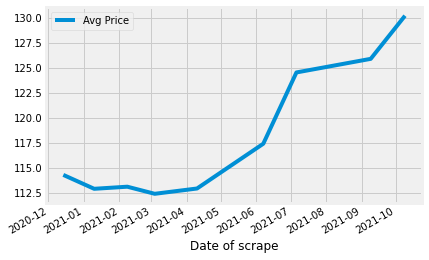

In [7]:
paris_summary.plot(x='Date of scrape', y='Avg Price')

In [8]:
paris_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date of scrape         9 non-null      datetime64[ns]
 1   # of Listings          9 non-null      int64         
 2   Avg Price              9 non-null      float64       
 3   Median Price           9 non-null      float64       
 4   Min Price              9 non-null      int64         
 5   Max Price              9 non-null      int64         
 6   Avg reviews per month  9 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 632.0 bytes


In [9]:
path = os.getcwd()
path

'/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb'

In [10]:
glob.glob('data/**/', recursive=True)

[]

In [11]:

%cd "/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1"

/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1


In [12]:
city_list = ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona',
            'Berlin', 'Bordeaux', 'Brussels', 'Copenhagen',
            'Crete', 'Dublin', 'Edinburgh', 'Florence',
            'Geneva', 'Istanbul', 'Lisbon', 'London',
            'Lyon', 'Madrid', 'Milan', 'Munich', 'Naples',
            'Oslo','Prague','Rome','Sicliy','Stockholm','Venice',
            'Vienna', 'Zurich']

In [13]:
files_amsterdam = glob.glob('amsterdam/**.csv')
files_antwerp = glob.glob('antwerp/**.csv')
files_athens = glob.glob('athens/**.csv')
files_barcelona = glob.glob('barcelona/**.csv')
files_berlin = glob.glob('berlin/**.csv')
files_bordeaux = glob.glob('bordeaux/**.csv')
files_brussels = glob.glob('brussels/**.csv')
files_copenhagen = glob.glob('copenhagen/**.csv')
files_crete = glob.glob('crete/**.csv')
files_dublin = glob.glob('dublin/**.csv')
files_edinburgh = glob.glob('edinburgh/**.csv')
files_florence = glob.glob('florence/**.csv')
files_geneva = glob.glob('geneva/**.csv')
files_istanbul = glob.glob('istanbul/**.csv')
files_lisbon = glob.glob('lisbon/**.csv')
files_london = glob.glob('london/**.csv')
files_lyon = glob.glob('lyon/**.csv')
files_madrid =glob.glob('madrid/**.csv') 
files_milan = glob.glob('milan/**.csv')
files_munich = glob.glob('munich/**.csv')
files_naples = glob.glob('naples/**.csv')
files_oslo = glob.glob('oslo/**.csv')
files_prague = glob.glob('prague/**.csv')
files_rome = glob.glob('rome/**.csv')
files_sicily = glob.glob('sicily/**.csv')
files_stockholm = glob.glob('stockholm/**.csv')
files_venice = glob.glob('venice/**.csv')
files_vienna = glob.glob('vienna/**.csv')
files_zurich = glob.glob('zurich/**.csv')



## Amsterdam

In [14]:
files_amsterdam

['amsterdam/Amsterdam_2021-07.csv',
 'amsterdam/Amsterdam_2021-06.csv',
 'amsterdam/Amsterdam_2021-04.csv',
 'amsterdam/Amsterdam_2021-10.csv',
 'amsterdam/Amsterdam_2021-11.csv',
 'amsterdam/Amsterdam_2021-05.csv',
 'amsterdam/Amsterdam_2021-01.csv',
 'amsterdam/Amsterdam_2021-02.csv',
 'amsterdam/Amsterdam_2021-03.csv',
 'amsterdam/Amsterdam_2020-12.csv',
 'amsterdam/Amsterdam_2021-08.csv',
 'amsterdam/Amsterdam_2021-09.csv']

In [15]:
amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(amsterdam_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_12_12_2020['price'].mean(),2)}.")

amsterdam_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(amsterdam_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_1_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(amsterdam_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_2_8_2021['price'].mean(),2)}.")

amsterdam_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(amsterdam_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_3_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(amsterdam_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_4_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(amsterdam_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_5_19_2021['price'].mean(),2)}.")

amsterdam_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(amsterdam_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_6_3_2021['price'].mean(),2)}.")

amsterdam_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(amsterdam_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_7_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(amsterdam_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_8_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(amsterdam_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_9_7_2021['price'].mean(),2)}.")

amsterdam_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(amsterdam_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_10_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_2021-11.csv')
print(f"The 11_4_2021 dataset contains {len(amsterdam_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18522 AirBnb listings; the avg price is €154.0.
The 1_9_2021 dataset contains 18395 AirBnb listings; the avg price is €152.58.
The 2_8_2021 dataset contains 18291 AirBnb listings; the avg price is €153.06.
The 3_4_2021 dataset contains 18201 AirBnb listings; the avg price is €153.72.
The 4_9_2021 dataset contains 17825 AirBnb listings; the avg price is €154.5.
The 5_19_2021 dataset contains 17031 AirBnb listings; the avg price is €153.73.
The 6_3_2021 dataset contains 16973 AirBnb listings; the avg price is €154.17.
The 7_4_2021 dataset contains 16724 AirBnb listings; the avg price is €156.16.
The 8_6_2021 dataset contains 16478 AirBnb listings; the avg price is €156.87.
The 9_7_2021 dataset contains 16116 AirBnb listings; the avg price is €156.91.
The 10_6_2021 dataset contains 5389 AirBnb listings; the avg price is €166.99.
The 11_4_2021 dataset contains 5402 AirBnb listings; the avg price is €169.0.


In [16]:
df_list_amsterdam = [amsterdam_raw_df_12_12_2020, amsterdam_raw_df_1_9_2021, amsterdam_raw_df_2_8_2021,
           amsterdam_raw_df_3_4_2021, amsterdam_raw_df_4_9_2021, amsterdam_raw_df_5_19_2021, amsterdam_raw_df_6_3_2021, amsterdam_raw_df_7_4_2021,
           amsterdam_raw_df_8_6_2021, amsterdam_raw_df_9_7_2021, amsterdam_raw_df_10_6_2021, amsterdam_raw_df_11_4_2021]

dates_amsterdam = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_amsterdam = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_amsterdam = []

def airbnb_parse(df_list, files):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        print(f"The {file} Amsterdam dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_amsterdam.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_amsterdam)

In [17]:
amsterdam_parse = airbnb_parse(df_list_amsterdam, files_amsterdam)
amsterdam_parse

The 2020-12 Amsterdam dataset contains 18522 AirBnb listings -- the avg price is €154.0.
The 2021-01 Amsterdam dataset contains 18395 AirBnb listings -- the avg price is €152.58.
The 2021-02 Amsterdam dataset contains 18291 AirBnb listings -- the avg price is €153.06.
The 2021-03 Amsterdam dataset contains 18201 AirBnb listings -- the avg price is €153.72.
The 2021-04 Amsterdam dataset contains 17825 AirBnb listings -- the avg price is €154.5.
The 2021-05 Amsterdam dataset contains 17031 AirBnb listings -- the avg price is €153.73.
The 2021-06 Amsterdam dataset contains 16973 AirBnb listings -- the avg price is €154.17.
The 2021-07 Amsterdam dataset contains 16724 AirBnb listings -- the avg price is €156.16.
The 2021-08 Amsterdam dataset contains 16478 AirBnb listings -- the avg price is €156.87.
The 2021-09 Amsterdam dataset contains 16116 AirBnb listings -- the avg price is €156.91.
The 2021-10 Amsterdam dataset contains 5389 AirBnb listings -- the avg price is €166.99.


In [18]:
amsterdam_summary = airbnb_to_frame(df_list_amsterdam, files_amsterdam)
amsterdam_summary['Date of scrape'] = pd.to_datetime(amsterdam_summary['Date of scrape'])
amsterdam_summary['City'] = 'Amsterdam'
amsterdam_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0      2020-12-01          18522     154.00         128.0          0   
1      2021-01-01          18395     152.58         126.0          0   
2      2021-02-01          18291     153.06         128.0          0   
3      2021-03-01          18201     153.72         129.0          0   
4      2021-04-01          17825     154.50         129.0          0   
5      2021-05-01          17031     153.73         128.0          0   
6      2021-06-01          16973     154.17         128.0          0   
7      2021-07-01          16724     156.16         129.0          0   
8      2021-08-01          16478     156.87         130.0          0   
9      2021-09-01          16116     156.91         130.0          0   
10     2021-10-01           5389     166.99         140.0          0   

    Max Price  Avg reviews per month       City  
0        8000                   0.64  Amsterdam  
1        8000                   0.61  Amsterdam  
2        8000                   0.59  Amsterdam  
3        8000                   0.58  Amsterdam  
4        8000                   0.56  Amsterdam  
5        8000                   0.55  Amsterdam  
6        8000                   0.61  Amsterdam  
7        8000                   0.61  Amsterdam  
8        8000                   0.64  Amsterdam  
9        8000                   0.68  Amsterdam  
10       6477                   1.37  Amsterdam

In [19]:
master_df_amsterdam = pd.concat(df_list_amsterdam)
master_df_amsterdam_unique = master_df_amsterdam.drop_duplicates(subset='id')
master_df_amsterdam_unique.head()

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  25428    Lovely apt in City Centre (w.lift) near Jordaan    56142   
3  27886  Romantic, stylish B&B houseboat in canal district    97647   
4  28871                            Comfortable double room   124245   

   host_name  neighbourhood_group                           neighbourhood  \
0     Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1  Alexander                  NaN                            Centrum-Oost   
2       Joan                  NaN                            Centrum-West   
3       Flip                  NaN                            Centrum-West   
4      Edwin                  NaN                            Centrum-Oost   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.36575    4.94142     Private room     59               3   
1  52.36509    4.89354     Private room    236               1   
2  52.37297    4.88339  Entire home/apt    125              14   
3  52.38761    4.89188     Private room    135               2   
4  52.36610    4.88953     Private room     75               2   

   number_of_reviews last_review  reviews_per_month  \
0                278  2020-02-14               1.95   
1                339  2020-04-09               2.58   
2                  5  2020-02-09               0.14   
3                219  2020-07-25               2.01   
4                336  2020-09-20               2.68   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               123                    NaN   
1                               2                 3                    NaN   
2                               1                33                    NaN   
3                               1               219                    NaN   
4                               2               346                    NaN   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

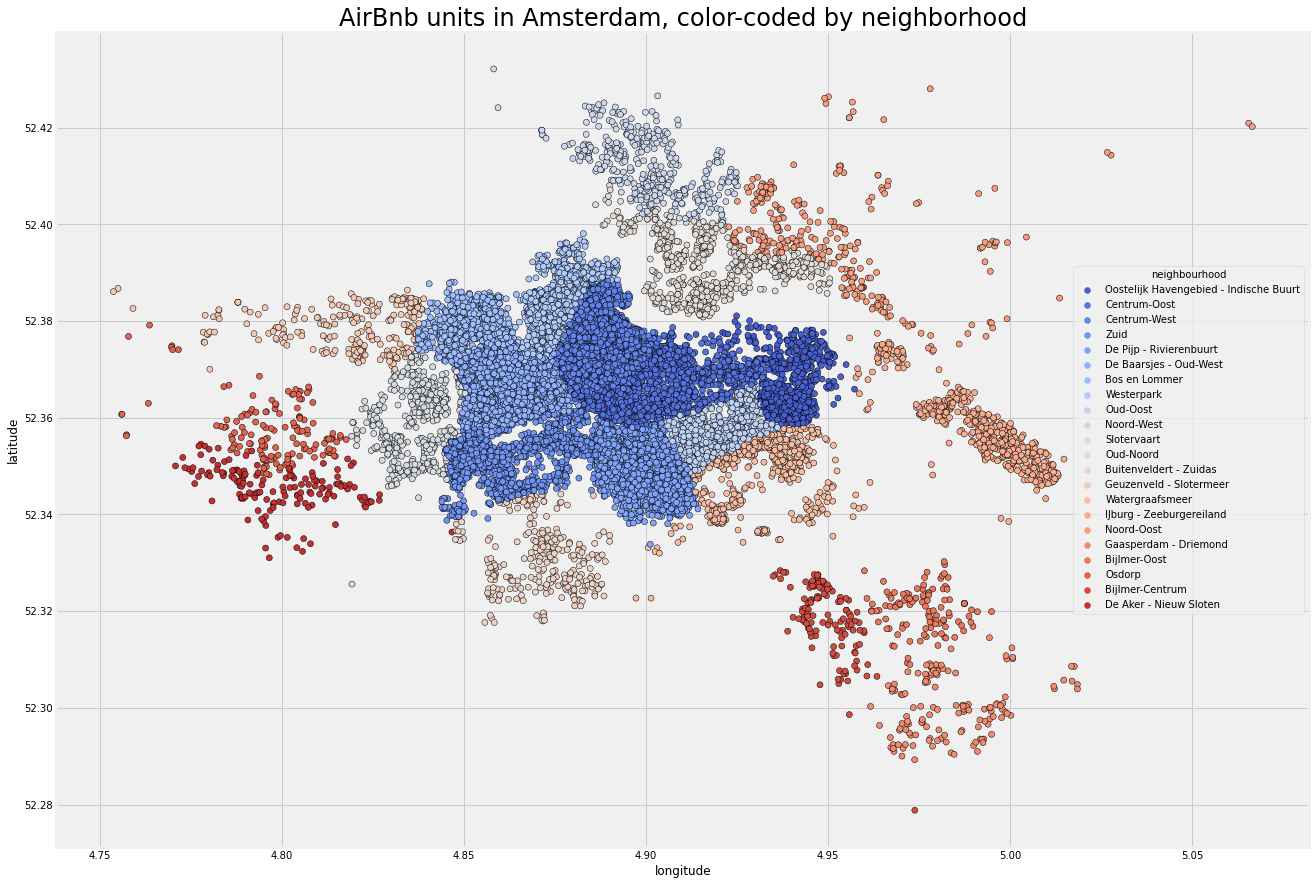

In [20]:
title = 'AirBnb units in Amsterdam, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_amsterdam_unique.longitude, master_df_amsterdam_unique.latitude, hue = master_df_amsterdam_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_amsterdam.png')
plt.show()


## Antwerp

In [21]:
files_antwerp

['antwerp/Antwerp_2021-01.csv',
 'antwerp/Antwerp_2021-02.csv',
 'antwerp/Antwerp_2021-03.csv',
 'antwerp/Antwerp_2021-07.csv',
 'antwerp/Antwerp_2021-06.csv',
 'antwerp/Antwerp_2021-04.csv',
 'antwerp/Antwerp_2021-10.csv',
 'antwerp/Antwerp_2021-08.csv',
 'antwerp/Antwerp_2021-09.csv',
 'antwerp/Antwerp_2020-11.csv',
 'antwerp/Antwerp_2020-12.csv']

In [22]:
antwerp_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(antwerp_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(antwerp_raw_df_12_12_2020['price'].mean(),2)}.")

antwerp_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(antwerp_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_1_9_2021['price'].mean(),2)}.")

antwerp_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(antwerp_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_2_8_2021['price'].mean(),2)}.")

antwerp_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(antwerp_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_3_4_2021['price'].mean(),2)}.")

antwerp_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(antwerp_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_4_9_2021['price'].mean(),2)}.")

#antwerp_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(antwerp_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_5_19_2021['price'].mean(),2)}.")

antwerp_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(antwerp_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_6_3_2021['price'].mean(),2)}.")

antwerp_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(antwerp_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_7_4_2021['price'].mean(),2)}.")

antwerp_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(antwerp_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_8_6_2021['price'].mean(),2)}.")

antwerp_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(antwerp_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_9_7_2021['price'].mean(),2)}.")

antwerp_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(antwerp_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_10_6_2021['price'].mean(),2)}.")

#antwerp_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(antwerp_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(antwerp_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 1751 AirBnb listings; the avg price is €94.93.
The 1_9_2021 dataset contains 1717 AirBnb listings; the avg price is €91.93.
The 2_8_2021 dataset contains 1716 AirBnb listings; the avg price is €91.52.
The 3_4_2021 dataset contains 1749 AirBnb listings; the avg price is €96.45.
The 4_9_2021 dataset contains 1739 AirBnb listings; the avg price is €99.19.
The 6_3_2021 dataset contains 1810 AirBnb listings; the avg price is €99.63.
The 7_4_2021 dataset contains 1843 AirBnb listings; the avg price is €100.1.
The 8_6_2021 dataset contains 1792 AirBnb listings; the avg price is €100.99.
The 9_7_2021 dataset contains 1776 AirBnb listings; the avg price is €103.83.
The 10_6_2021 dataset contains 1750 AirBnb listings; the avg price is €106.99.


In [23]:
df_list_antwerp = [antwerp_raw_df_12_12_2020, antwerp_raw_df_1_9_2021, antwerp_raw_df_2_8_2021,
           antwerp_raw_df_3_4_2021, antwerp_raw_df_4_9_2021, antwerp_raw_df_6_3_2021, antwerp_raw_df_7_4_2021,
           antwerp_raw_df_8_6_2021, antwerp_raw_df_9_7_2021, antwerp_raw_df_10_6_2021]

dates_antwerp = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', #'05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_antwerp = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_antwerp = []

def airbnb_parse(df_list, files):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        print(f"The {file} antwerp dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_antwerp:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/antwerp/antwerp_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_antwerp.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_antwerp)

In [24]:
antwerp_parse = airbnb_parse(df_list_antwerp, files_antwerp)
antwerp_parse

The 2020-12 antwerp dataset contains 1751 AirBnb listings -- the avg price is €94.93.
The 2021-01 antwerp dataset contains 1717 AirBnb listings -- the avg price is €91.93.
The 2021-02 antwerp dataset contains 1716 AirBnb listings -- the avg price is €91.52.
The 2021-03 antwerp dataset contains 1749 AirBnb listings -- the avg price is €96.45.
The 2021-04 antwerp dataset contains 1739 AirBnb listings -- the avg price is €99.19.
The 2021-06 antwerp dataset contains 1810 AirBnb listings -- the avg price is €99.63.
The 2021-07 antwerp dataset contains 1843 AirBnb listings -- the avg price is €100.1.
The 2021-08 antwerp dataset contains 1792 AirBnb listings -- the avg price is €100.99.
The 2021-09 antwerp dataset contains 1776 AirBnb listings -- the avg price is €103.83.
The 2021-10 antwerp dataset contains 1750 AirBnb listings -- the avg price is €106.99.


In [25]:
antwerp_summary = airbnb_to_frame(df_list_antwerp, files_antwerp)
antwerp_summary['Date of scrape'] = pd.to_datetime(antwerp_summary['Date of scrape'])
antwerp_summary['City'] = 'antwerp'
antwerp_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01           1751      94.93          71.0         12   
1     2021-01-01           1717      91.93          68.0         12   
2     2021-02-01           1716      91.52          68.0          8   
3     2021-03-01           1749      96.45          70.0         12   
4     2021-04-01           1739      99.19          70.0         10   
5     2021-06-01           1810      99.63          71.0         12   
6     2021-07-01           1843     100.10          75.0         12   
7     2021-08-01           1792     100.99          75.0         12   
8     2021-09-01           1776     103.83          75.0         13   
9     2021-10-01           1750     106.99          75.0         12   

   Max Price  Avg reviews per month     City  
0       3200                   1.29  antwerp  
1       3200                   1.27  antwerp  
2       3200                   1.27  antwerp  
3       3200                   1.24  antwerp  
4       5800                   1.23  antwerp  
5       5800                   1.32  antwerp  
6       5800                   1.37  antwerp  
7       5800                   1.58  antwerp  
8       5800                   1.61  antwerp  
9       5800                   1.65  antwerp

In [26]:
master_df_antwerp = pd.concat(df_list_antwerp)
master_df_antwerp_unique = master_df_antwerp.drop_duplicates(subset='id')
master_df_antwerp_unique.head()

id                                           name  host_id host_name  \
0   50904  aplace/antwerp: cosy suite - fashion district   234077     Karin   
1  116134              Trendy Vacation Apartment Antwerp   586942      Paul   
2  224333     Large stylish room in 1930s house + garden  1167377     Geert   
3  224682          APARTMENT ROSCAM - OLD CENTRE ANTWERP  1263933  Kristien   
4  328911            Large Modern Apt W Great Park Views  1263814     Tinne   

   neighbourhood_group       neighbourhood  latitude  longitude  \
0                  NaN  Historisch Centrum  51.21825    4.39901   
1                  NaN            Eilandje  51.23051    4.40593   
2                  NaN    Deurne Zuid West  51.19772    4.45853   
3                  NaN        Sint-Andries  51.21722    4.39790   
4                  NaN           Stadspark  51.21078    4.41050   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0       Hotel room    158               1                  1  2015-05-06   
1  Entire home/apt    150               2                102  2020-11-16   
2     Private room     16              14                  2  2020-07-04   
3  Entire home/apt     86               2                337  2020-12-28   
4  Entire home/apt     44              15                 59  2019-10-30   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.01                               4               246   
1               0.95                               1               352   
2               0.02                               2                 1   
3               3.12                               1               362   
4               0.55                               1                57   

   number_of_reviews_ltm  license  
0                    NaN      NaN  
1                    NaN      NaN  
2                    NaN      NaN  
3                    NaN      NaN  
4                    NaN      NaN

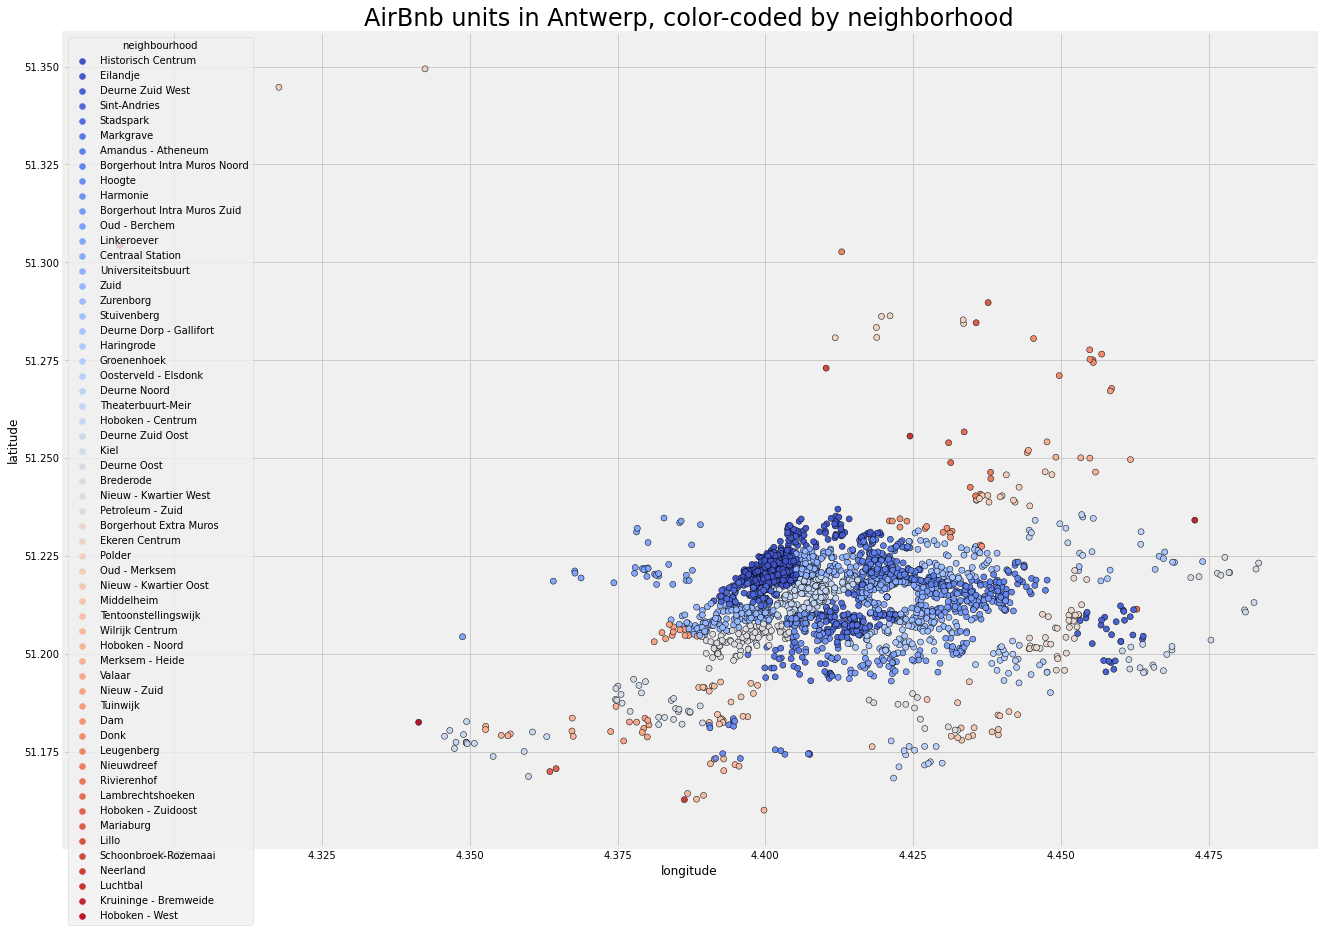

In [27]:
title = 'AirBnb units in Antwerp, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_antwerp_unique.longitude, master_df_antwerp_unique.latitude, hue = master_df_antwerp_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_antwerp.png')
plt.show()


## Athens

In [28]:
files_athens

['athens/Athens_2020-12.csv',
 'athens/Athens_2021-08.csv',
 'athens/Athens_2021-09.csv',
 'athens/Athens_2021-02.csv',
 'athens/Athens_2021-03.csv',
 'athens/Athens_2021-01.csv',
 'athens/Athens_2021-10.csv',
 'athens/Athens_2021-04.csv',
 'athens/Athens_2021-07.csv',
 'athens/Athens_2021-06.csv']

In [29]:
athens_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(athens_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(athens_raw_df_12_12_2020['price'].mean(),2)}.")

athens_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(athens_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_1_9_2021['price'].mean(),2)}.")

athens_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(athens_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_2_8_2021['price'].mean(),2)}.")

athens_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(athens_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_3_4_2021['price'].mean(),2)}.")

athens_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(athens_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_4_9_2021['price'].mean(),2)}.")

#athens_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(athens_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_5_19_2021['price'].mean(),2)}.")

athens_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(athens_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_6_3_2021['price'].mean(),2)}.")

athens_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(athens_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_7_4_2021['price'].mean(),2)}.")

athens_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(athens_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_8_6_2021['price'].mean(),2)}.")

athens_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(athens_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_9_7_2021['price'].mean(),2)}.")

athens_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(athens_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_10_6_2021['price'].mean(),2)}.")

#athens_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(athens_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(athens_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 9413 AirBnb listings; the avg price is €68.86.
The 1_9_2021 dataset contains 9482 AirBnb listings; the avg price is €74.33.
The 2_8_2021 dataset contains 9467 AirBnb listings; the avg price is €73.43.
The 3_4_2021 dataset contains 9510 AirBnb listings; the avg price is €74.94.
The 4_9_2021 dataset contains 9618 AirBnb listings; the avg price is €81.68.
The 6_3_2021 dataset contains 9584 AirBnb listings; the avg price is €86.28.
The 7_4_2021 dataset contains 9640 AirBnb listings; the avg price is €90.54.
The 8_6_2021 dataset contains 9773 AirBnb listings; the avg price is €84.23.
The 9_7_2021 dataset contains 9766 AirBnb listings; the avg price is €83.34.
The 10_6_2021 dataset contains 9582 AirBnb listings; the avg price is €83.44.


In [30]:
df_list_athens = [athens_raw_df_12_12_2020, athens_raw_df_1_9_2021, athens_raw_df_2_8_2021,
           athens_raw_df_3_4_2021, athens_raw_df_4_9_2021, athens_raw_df_6_3_2021, athens_raw_df_7_4_2021,
           athens_raw_df_8_6_2021, athens_raw_df_9_7_2021, athens_raw_df_10_6_2021]

dates_athens = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_athens = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_athens = []

def airbnb_parse(df_list, files):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        print(f"The {file} athens dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_athens:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/athens/athens_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_athens.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_athens)

In [31]:
athens_parse = airbnb_parse(df_list_athens, files_athens)
athens_parse

The 2020-12 athens dataset contains 9413 AirBnb listings -- the avg price is €68.86.
The 2021-01 athens dataset contains 9482 AirBnb listings -- the avg price is €74.33.
The 2021-02 athens dataset contains 9467 AirBnb listings -- the avg price is €73.43.
The 2021-03 athens dataset contains 9510 AirBnb listings -- the avg price is €74.94.
The 2021-04 athens dataset contains 9618 AirBnb listings -- the avg price is €81.68.
The 2021-06 athens dataset contains 9584 AirBnb listings -- the avg price is €86.28.
The 2021-07 athens dataset contains 9640 AirBnb listings -- the avg price is €90.54.
The 2021-08 athens dataset contains 9773 AirBnb listings -- the avg price is €84.23.
The 2021-09 athens dataset contains 9766 AirBnb listings -- the avg price is €83.34.
The 2021-10 athens dataset contains 9582 AirBnb listings -- the avg price is €83.44.


In [32]:
athens_summary = airbnb_to_frame(df_list_athens, files_athens)
athens_summary['Date of scrape'] = pd.to_datetime(athens_summary['Date of scrape'])
athens_summary['City'] = 'athens'
athens_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01           9413      68.86          45.0          7   
1     2021-01-01           9482      74.33          43.0          0   
2     2021-02-01           9467      73.43          43.0          7   
3     2021-03-01           9510      74.94          45.0          6   
4     2021-04-01           9618      81.68          45.0          6   
5     2021-06-01           9584      86.28          50.0          9   
6     2021-07-01           9640      90.54          50.0          8   
7     2021-08-01           9773      84.23          51.0          9   
8     2021-09-01           9766      83.34          50.0          9   
9     2021-10-01           9582      83.44          50.0          9   

   Max Price  Avg reviews per month    City  
0       8000                   1.52  athens  
1       8000                   1.45  athens  
2       8000                   1.42  athens  
3       8000                   1.39  athens  
4       8000                   1.36  athens  
5       8000                   1.51  athens  
6       8000                   1.58  athens  
7       8000                   1.78  athens  
8       8000                   1.85  athens  
9       8000                   1.86  athens

In [33]:
master_df_athens = pd.concat(df_list_athens)
master_df_athens_unique = master_df_athens.drop_duplicates(subset='id')
master_df_athens_unique.head()

id                                            name  host_id  host_name  \
0  10595             96m2, 3BR, 2BA, Metro, WI-FI etc...    37177  Emmanouil   
1  10990    Athens Quality Apartments - Deluxe Apartment    37177  Emmanouil   
2  10993              Athens Quality Apartments - Studio    37177  Emmanouil   
3  10995  AQA-No2 1-bedroom, smart tv, fiber connection,    37177  Emmanouil   
4  27262              54m2, 1-br, cable tv, wi-fi, metro    37177  Emmanouil   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt   
1                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt   
2                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76473  Entire home/apt   
3                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt   
4                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98924   23.76500  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     77               1                 25  2020-10-06               0.21   
1     38               1                 44  2020-12-10               0.44   
2     32               1                 54  2020-12-09               0.54   
3     45               1                 23  2020-10-03               0.18   
4     39               1                 17  2020-01-08               0.17   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               6                 0                    NaN   
1                               6                72                    NaN   
2                               6               218                    NaN   
3                               6               318                    NaN   
4                               6                91                    NaN   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

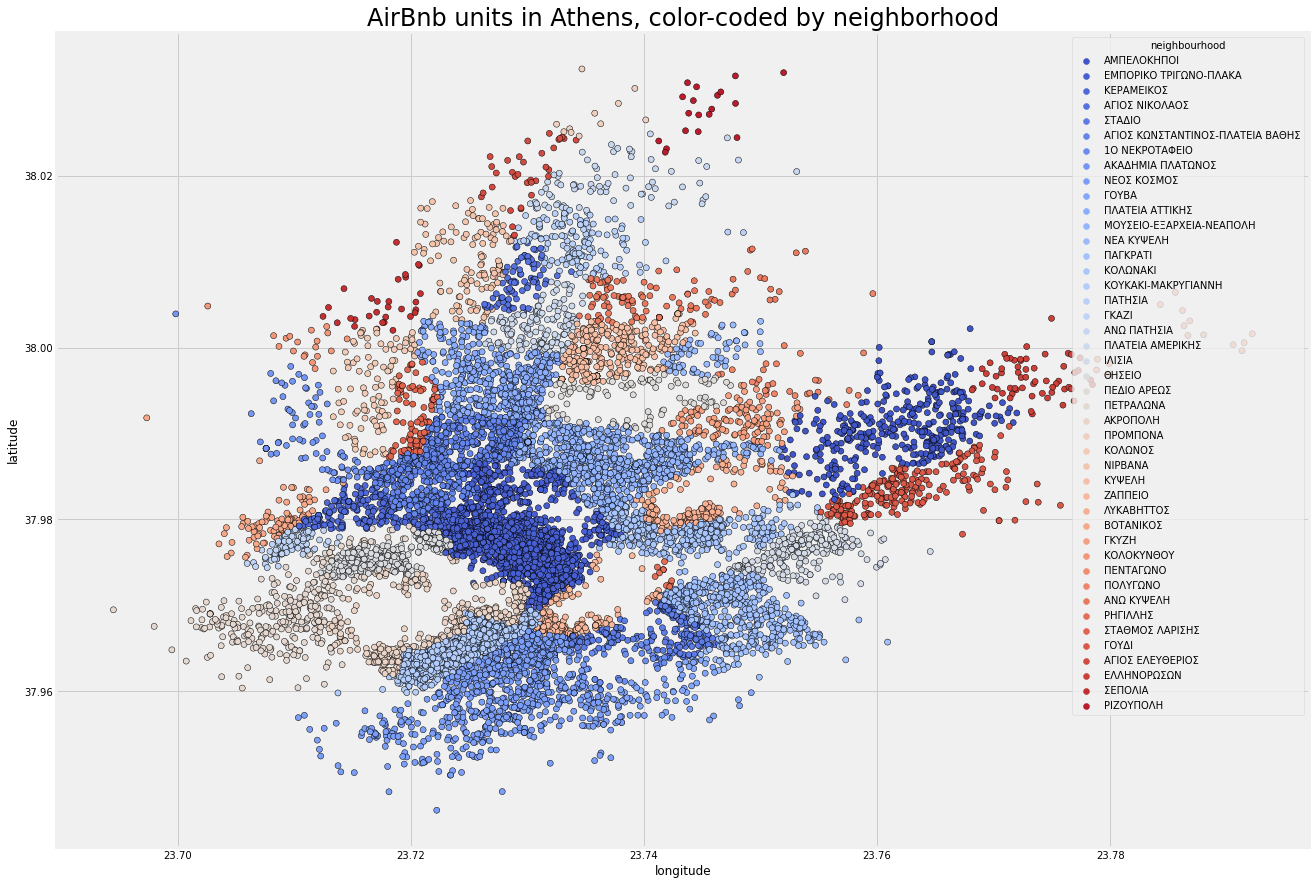

In [34]:
title = 'AirBnb units in Athens, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_athens_unique.longitude, master_df_athens_unique.latitude, hue = master_df_athens_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_athens.png')
plt.show()


## Barcelona

In [35]:
files_barcelona

['barcelona/Barcelona_2020-12.csv',
 'barcelona/Barcelona_2021-08.csv',
 'barcelona/Barcelona_2021-09.csv',
 'barcelona/Barcelona_2021-01.csv',
 'barcelona/Barcelona_2021-02.csv',
 'barcelona/Barcelona_2021-03.csv',
 'barcelona/Barcelona_2021-07.csv',
 'barcelona/Barcelona_2021-06.csv',
 'barcelona/Barcelona_2021-04.csv',
 'barcelona/Barcelona_2021-10.csv',
 'barcelona/Barcelona_2021-05.csv']

In [36]:
barcelona_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(barcelona_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(barcelona_raw_df_12_12_2020['price'].mean(),2)}.")

barcelona_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(barcelona_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_1_9_2021['price'].mean(),2)}.")

barcelona_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(barcelona_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_2_8_2021['price'].mean(),2)}.")

barcelona_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(barcelona_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_3_4_2021['price'].mean(),2)}.")

barcelona_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(barcelona_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_4_9_2021['price'].mean(),2)}.")

barcelona_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(barcelona_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_5_19_2021['price'].mean(),2)}.")

barcelona_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(barcelona_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_6_3_2021['price'].mean(),2)}.")

barcelona_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(barcelona_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_7_4_2021['price'].mean(),2)}.")

barcelona_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(barcelona_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_8_6_2021['price'].mean(),2)}.")

barcelona_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(barcelona_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_9_7_2021['price'].mean(),2)}.")

barcelona_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(barcelona_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_10_6_2021['price'].mean(),2)}.")

#barcelona_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(barcelona_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(barcelona_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 19641 AirBnb listings; the avg price is €91.91.
The 1_9_2021 dataset contains 18569 AirBnb listings; the avg price is €103.39.
The 2_8_2021 dataset contains 18471 AirBnb listings; the avg price is €103.76.
The 3_4_2021 dataset contains 18286 AirBnb listings; the avg price is €106.15.
The 4_9_2021 dataset contains 18226 AirBnb listings; the avg price is €110.39.
The 5_19_2021 dataset contains 17663 AirBnb listings; the avg price is €111.69.
The 6_3_2021 dataset contains 17589 AirBnb listings; the avg price is €111.72.
The 7_4_2021 dataset contains 17079 AirBnb listings; the avg price is €115.01.
The 8_6_2021 dataset contains 16554 AirBnb listings; the avg price is €115.96.
The 9_7_2021 dataset contains 16206 AirBnb listings; the avg price is €109.26.
The 10_6_2021 dataset contains 16055 AirBnb listings; the avg price is €112.47.


In [37]:
df_list_barcelona = [barcelona_raw_df_12_12_2020, barcelona_raw_df_1_9_2021, barcelona_raw_df_2_8_2021,
           barcelona_raw_df_3_4_2021, barcelona_raw_df_4_9_2021, barcelona_raw_df_5_19_2021, barcelona_raw_df_6_3_2021, barcelona_raw_df_7_4_2021,
           barcelona_raw_df_8_6_2021, barcelona_raw_df_9_7_2021, barcelona_raw_df_10_6_2021]

dates_barcelona = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_barcelona = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_barcelona = []

def airbnb_parse(df_list, files):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        print(f"The {file} barcelona dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_barcelona:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/barcelona/barcelona_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_barcelona.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_barcelona)

In [38]:
barcelona_parse = airbnb_parse(df_list_barcelona, files_barcelona)
barcelona_parse

The 2020-12 barcelona dataset contains 19641 AirBnb listings -- the avg price is €91.91.
The 2021-01 barcelona dataset contains 18569 AirBnb listings -- the avg price is €103.39.
The 2021-02 barcelona dataset contains 18471 AirBnb listings -- the avg price is €103.76.
The 2021-03 barcelona dataset contains 18286 AirBnb listings -- the avg price is €106.15.
The 2021-04 barcelona dataset contains 18226 AirBnb listings -- the avg price is €110.39.
The 2021-05 barcelona dataset contains 17663 AirBnb listings -- the avg price is €111.69.
The 2021-06 barcelona dataset contains 17589 AirBnb listings -- the avg price is €111.72.
The 2021-07 barcelona dataset contains 17079 AirBnb listings -- the avg price is €115.01.
The 2021-08 barcelona dataset contains 16554 AirBnb listings -- the avg price is €115.96.
The 2021-09 barcelona dataset contains 16206 AirBnb listings -- the avg price is €109.26.
The 2021-10 barcelona dataset contains 16055 AirBnb listings -- the avg price is €112.47.


In [39]:
barcelona_summary = airbnb_to_frame(df_list_barcelona, files_barcelona)
barcelona_summary['Date of scrape'] = pd.to_datetime(barcelona_summary['Date of scrape'])
barcelona_summary['City'] = 'barcelona'
barcelona_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0      2020-12-01          19641      91.91          55.0          0   
1      2021-01-01          18569     103.39          53.0          0   
2      2021-02-01          18471     103.76          54.0          0   
3      2021-03-01          18286     106.15          55.0          0   
4      2021-04-01          18226     110.39          55.0          0   
5      2021-05-01          17663     111.69          60.0          0   
6      2021-06-01          17589     111.72          60.0          0   
7      2021-07-01          17079     115.01          69.0          0   
8      2021-08-01          16554     115.96          70.0          0   
9      2021-09-01          16206     109.26          70.0          0   
10     2021-10-01          16055     112.47          70.0          0   

    Max Price  Avg reviews per month       City  
0       11500                   1.01  barcelona  
1       11500                   0.99  barcelona  
2       11500                   0.96  barcelona  
3       11500                   0.94  barcelona  
4       11500                   0.92  barcelona  
5       10045                   0.91  barcelona  
6       10045                   0.99  barcelona  
7        9999                   1.01  barcelona  
8        9999                   1.08  barcelona  
9        9999                   1.16  barcelona  
10       9999                   1.16  barcelona

In [40]:
master_df_barcelona = pd.concat(df_list_barcelona)
master_df_barcelona_unique = master_df_barcelona.drop_duplicates(subset='id')
master_df_barcelona_unique.head()

id                                             name  host_id  \
0  21974               Comf. double room/private bathroom    73163   
1  23197  Forum DeLuxe 5 mins Walk  To CCIB Center & Sea★    90417   
2  32711                 Sagrada Familia area - Còrsega 1   135703   
3  34241                 Private Double room - Plaza Real    73163   
4  34981             VIDRE HOME PLAZA REAL on LAS RAMBLAS    73163   

        host_name neighbourhood_group                       neighbourhood  \
0          Andres        Ciutat Vella                      el Barri Gòtic   
1  Etain (Marnie)          Sant Martí               el Besòs i el Maresme   
2            Nick              Gràcia  el Camp d'en Grassot i Gràcia Nova   
3          Andres        Ciutat Vella                      el Barri Gòtic   
4          Andres        Ciutat Vella                      el Barri Gòtic   

   latitude  longitude        room_type  price  minimum_nights  \
0  41.37973    2.17631     Private room     80               3   
1  41.41291    2.22063  Entire home/apt    183               3   
2  41.40566    2.17015  Entire home/apt     98               2   
3  41.37916    2.17535     Private room     46              30   
4  41.37978    2.17623  Entire home/apt    183               4   

   number_of_reviews last_review  reviews_per_month  \
0                  2  2017-11-06               0.05   
1                 52  2019-12-15               0.44   
2                 63  2020-02-22               0.55   
3                  8  2013-07-15               0.06   
4                149  2020-03-11               1.20   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               3               134                    NaN   
1                               2               320                    NaN   
2                               5                 0                    NaN   
3                               3                 0                    NaN   
4                               3                67                    NaN   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

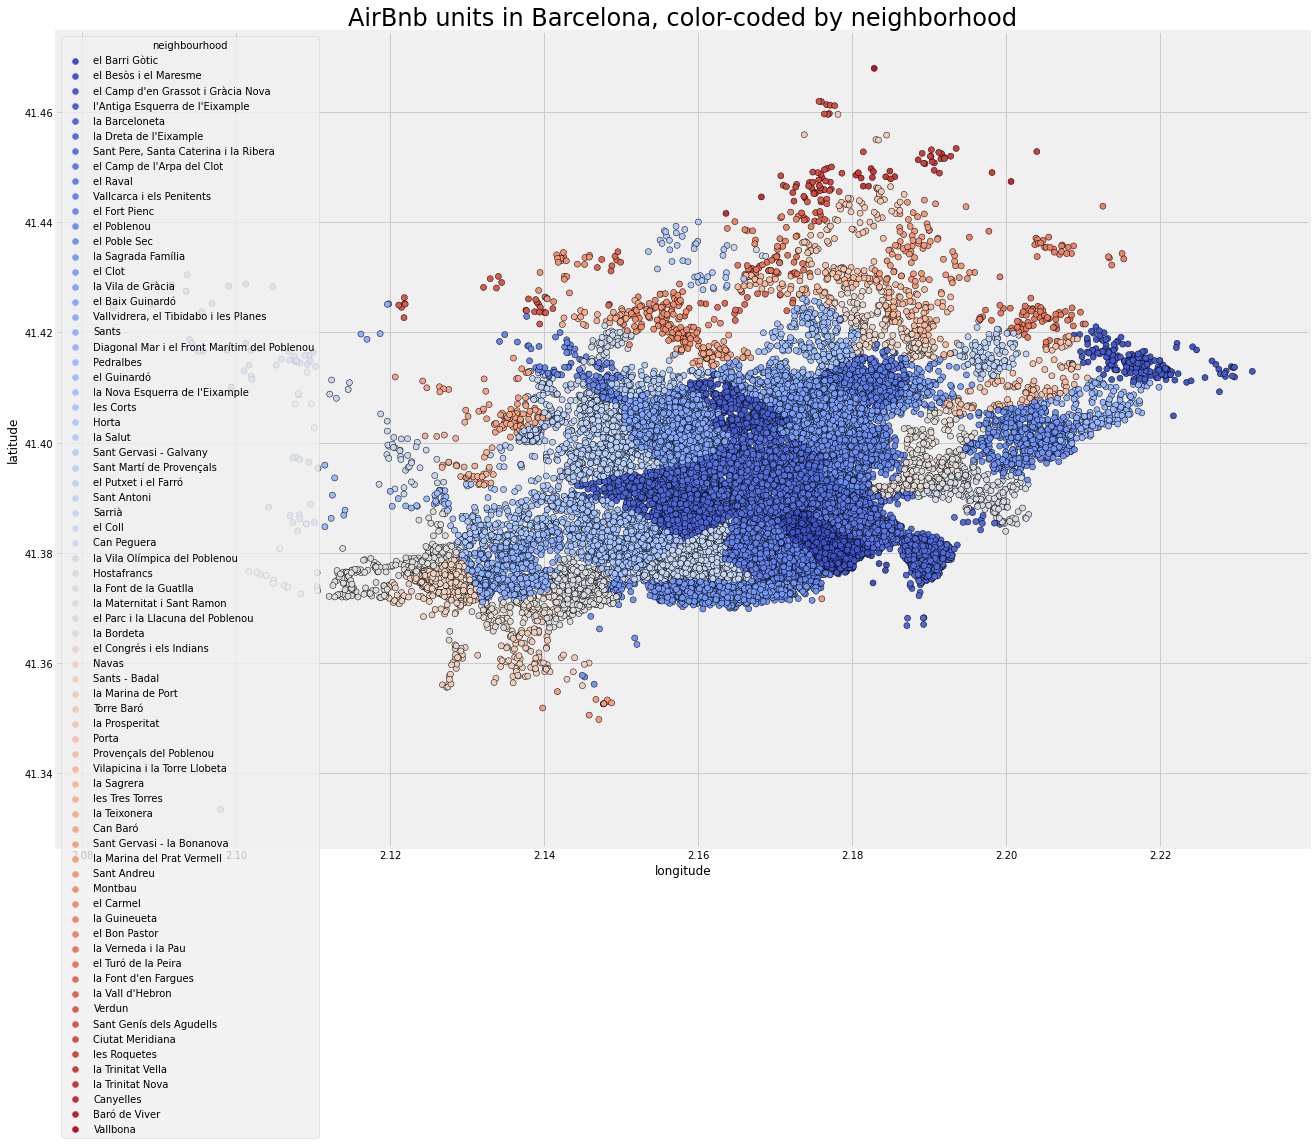

In [41]:
title = 'AirBnb units in Barcelona, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_barcelona_unique.longitude, master_df_barcelona_unique.latitude, hue = master_df_barcelona_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_barcelona.png')
plt.show()


## Berlin

In [42]:
files_berlin

['berlin/Berlin_2020-12.csv',
 'berlin/Berlin_2021-09.csv',
 'berlin/Berlin_2021-08.csv',
 'berlin/Berlin_2021-01.csv',
 'berlin/Berlin_2021-03.csv',
 'berlin/Berlin_2021-02.csv',
 'berlin/Berlin_2021-06.csv',
 'berlin/Berlin_2021-07.csv',
 'berlin/Berlin_2021-10.csv',
 'berlin/Berlin_2021-04.csv']

In [43]:
berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(berlin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(berlin_raw_df_12_12_2020['price'].mean(),2)}.")

berlin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(berlin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_1_9_2021['price'].mean(),2)}.")

berlin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(berlin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_2_8_2021['price'].mean(),2)}.")

berlin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(berlin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_3_4_2021['price'].mean(),2)}.")

berlin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(berlin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_4_9_2021['price'].mean(),2)}.")

#berlin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(berlin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_5_19_2021['price'].mean(),2)}.")

berlin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(berlin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_6_3_2021['price'].mean(),2)}.")

berlin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(berlin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_7_4_2021['price'].mean(),2)}.")

berlin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(berlin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_8_6_2021['price'].mean(),2)}.")

berlin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(berlin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_9_7_2021['price'].mean(),2)}.")

berlin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(berlin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_10_6_2021['price'].mean(),2)}.")

#berlin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(berlin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20224 AirBnb listings; the avg price is €72.95.
The 1_9_2021 dataset contains 20050 AirBnb listings; the avg price is €70.29.
The 2_8_2021 dataset contains 19978 AirBnb listings; the avg price is €70.56.
The 3_4_2021 dataset contains 19858 AirBnb listings; the avg price is €70.78.
The 4_9_2021 dataset contains 19752 AirBnb listings; the avg price is €72.55.
The 6_3_2021 dataset contains 18978 AirBnb listings; the avg price is €73.54.
The 7_4_2021 dataset contains 19095 AirBnb listings; the avg price is €73.3.
The 8_6_2021 dataset contains 18547 AirBnb listings; the avg price is €74.48.
The 9_7_2021 dataset contains 18288 AirBnb listings; the avg price is €75.19.
The 10_6_2021 dataset contains 17500 AirBnb listings; the avg price is €74.9.


In [44]:
df_list_berlin = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021,
           berlin_raw_df_3_4_2021, berlin_raw_df_4_9_2021, berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021,
           berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021, berlin_raw_df_10_6_2021]

dates_berlin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_berlin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_berlin = []

def airbnb_parse(df_list, files):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        print(f"The {file} berlin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_berlin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_berlin)

In [45]:
berlin_parse = airbnb_parse(df_list_berlin, files_berlin)
berlin_parse

The 2020-12 berlin dataset contains 20224 AirBnb listings -- the avg price is €72.95.
The 2021-01 berlin dataset contains 20050 AirBnb listings -- the avg price is €70.29.
The 2021-02 berlin dataset contains 19978 AirBnb listings -- the avg price is €70.56.
The 2021-03 berlin dataset contains 19858 AirBnb listings -- the avg price is €70.78.
The 2021-04 berlin dataset contains 19752 AirBnb listings -- the avg price is €72.55.
The 2021-06 berlin dataset contains 18978 AirBnb listings -- the avg price is €73.54.
The 2021-07 berlin dataset contains 19095 AirBnb listings -- the avg price is €73.3.
The 2021-08 berlin dataset contains 18547 AirBnb listings -- the avg price is €74.48.
The 2021-09 berlin dataset contains 18288 AirBnb listings -- the avg price is €75.19.
The 2021-10 berlin dataset contains 17500 AirBnb listings -- the avg price is €74.9.


In [46]:
berlin_summary = airbnb_to_frame(df_list_berlin, files_berlin)
berlin_summary['Date of scrape'] = pd.to_datetime(berlin_summary['Date of scrape'])
berlin_summary['City'] = 'berlin'
berlin_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01          20224      72.95          50.0          0   
1     2021-01-01          20050      70.29          50.0          0   
2     2021-02-01          19978      70.56          50.0          0   
3     2021-03-01          19858      70.78          50.0          0   
4     2021-04-01          19752      72.55          50.0          0   
5     2021-06-01          18978      73.54          52.0          0   
6     2021-07-01          19095      73.30          52.0          0   
7     2021-08-01          18547      74.48          55.0          0   
8     2021-09-01          18288      75.19          55.0          0   
9     2021-10-01          17500      74.90          55.0          0   

   Max Price  Avg reviews per month    City  
0       8000                   0.75  berlin  
1       8000                   0.72  berlin  
2       8000                   0.69  berlin  
3       8000                   0.67  berlin  
4       8000                   0.66  berlin  
5       8000                   0.71  berlin  
6       8000                   0.72  berlin  
7       8000                   0.79  berlin  
8       8000                   0.82  berlin  
9       8000                   0.81  berlin

In [47]:
master_df_berlin = pd.concat(df_list_berlin)
master_df_berlin_unique = master_df_berlin.drop_duplicates(subset='id')
master_df_berlin_unique.head()

id                                               name  host_id  \
0  2015   Berlin-Mitte Value! Quiet courtyard/very central     2217   
1  3176                    Fabulous Flat in great Location     3718   
2  3309                  BerlinSpot Schöneberg near KaDeWe     4108   
3  6883  Stylish East Side Loft in Center with AC & 2 b...    16149   
4  7071                   BrightRoom with sunny greenview!    17391   

    host_name       neighbourhood_group             neighbourhood  latitude  \
0         Ion                     Mitte           Brunnenstr. Süd  52.53454   
1      Britta                    Pankow   Prenzlauer Berg Südwest  52.53500   
2        Jana    Tempelhof - Schöneberg           Schöneberg-Nord  52.49885   
3     Steffen  Friedrichshain-Kreuzberg  Frankfurter Allee Süd FK  52.51171   
4  BrightRoom                    Pankow            Helmholtzplatz  52.54316   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   13.40256  Entire home/apt     42               5                134   
1   13.41758  Entire home/apt     90              62                146   
2   13.34906     Private room     29               7                 27   
3   13.45477  Entire home/apt     79               7                133   
4   13.41509     Private room     33               1                293   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2020-09-26               2.34                               6   
1  2020-05-27               1.04                               1   
2  2019-05-31               0.30                               1   
3  2020-02-16               1.01                               1   
4  2020-03-31               2.12                               1   

   availability_365  number_of_reviews_ltm license  
0               180                    NaN     NaN  
1               276                    NaN     NaN  
2               355                    NaN     NaN  
3                14                    NaN     NaN  
4                 0                    NaN     NaN

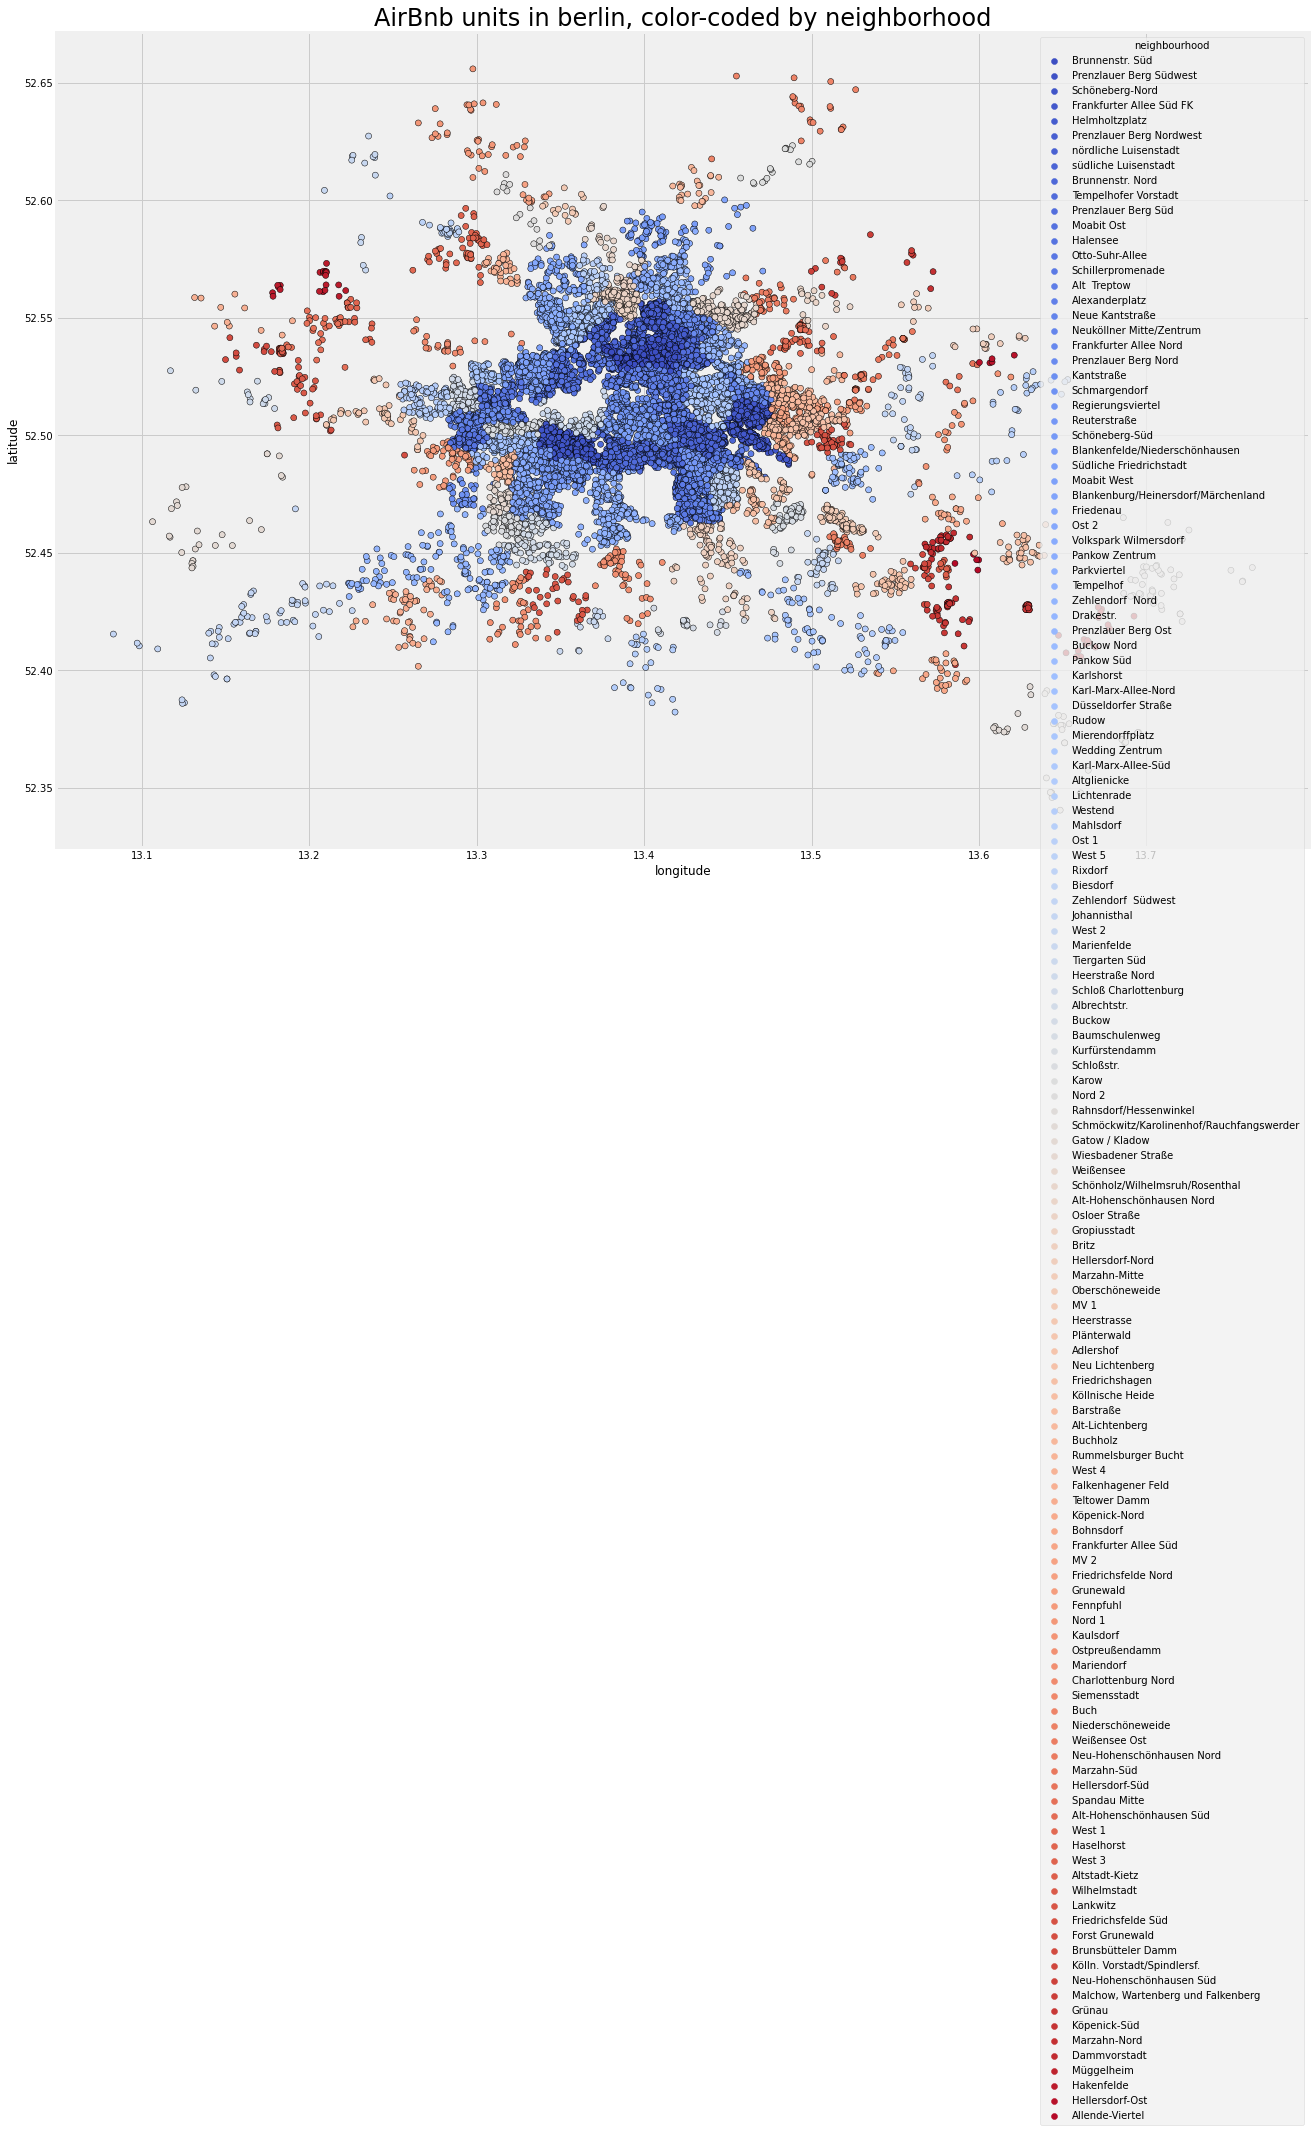

In [48]:
title = 'AirBnb units in berlin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_berlin_unique.longitude, master_df_berlin_unique.latitude, hue = master_df_berlin_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_berlin.png')
plt.show()


## Bordeaux

In [49]:
files_bordeaux

['bordeaux/Bordeaux_2021-08.csv',
 'bordeaux/Bordeaux_2021-09.csv',
 'bordeaux/Bordeaux_2020-12.csv',
 'bordeaux/Bordeaux_2021-10.csv',
 'bordeaux/Bordeaux_2021-04.csv',
 'bordeaux/Bordeaux_2021-07.csv',
 'bordeaux/Bordeaux_2021-06.csv',
 'bordeaux/Bordeaux_2021-02.csv',
 'bordeaux/Bordeaux_2021-03.csv',
 'bordeaux/Bordeaux_2021-01.csv']

In [50]:
bordeaux_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(bordeaux_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_12_12_2020['price'].mean(),2)}.")

bordeaux_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(bordeaux_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_1_9_2021['price'].mean(),2)}.")

bordeaux_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(bordeaux_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_2_8_2021['price'].mean(),2)}.")

bordeaux_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(bordeaux_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_3_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(bordeaux_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_4_9_2021['price'].mean(),2)}.")

#bordeaux_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(bordeaux_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_5_19_2021['price'].mean(),2)}.")

bordeaux_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(bordeaux_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_6_3_2021['price'].mean(),2)}.")

bordeaux_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(bordeaux_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_7_4_2021['price'].mean(),2)}.")

bordeaux_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(bordeaux_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_8_6_2021['price'].mean(),2)}.")

bordeaux_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(bordeaux_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_9_7_2021['price'].mean(),2)}.")

bordeaux_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(bordeaux_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_10_6_2021['price'].mean(),2)}.")

#bordeaux_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(bordeaux_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(bordeaux_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 10562 AirBnb listings; the avg price is €89.18.
The 1_9_2021 dataset contains 10615 AirBnb listings; the avg price is €87.85.
The 2_8_2021 dataset contains 10590 AirBnb listings; the avg price is €89.51.
The 3_4_2021 dataset contains 10466 AirBnb listings; the avg price is €89.95.
The 4_9_2021 dataset contains 10567 AirBnb listings; the avg price is €91.56.
The 6_3_2021 dataset contains 10496 AirBnb listings; the avg price is €94.35.
The 7_4_2021 dataset contains 10616 AirBnb listings; the avg price is €95.36.
The 8_6_2021 dataset contains 9663 AirBnb listings; the avg price is €98.91.
The 9_7_2021 dataset contains 9440 AirBnb listings; the avg price is €96.77.
The 10_6_2021 dataset contains 9424 AirBnb listings; the avg price is €96.95.


In [51]:
df_list_bordeaux = [bordeaux_raw_df_12_12_2020, bordeaux_raw_df_1_9_2021, bordeaux_raw_df_2_8_2021,
           bordeaux_raw_df_3_4_2021, bordeaux_raw_df_4_9_2021, bordeaux_raw_df_6_3_2021, bordeaux_raw_df_7_4_2021,
           bordeaux_raw_df_8_6_2021, bordeaux_raw_df_9_7_2021, bordeaux_raw_df_10_6_2021]

dates_bordeaux = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', 
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_bordeaux = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_bordeaux = []

def airbnb_parse(df_list, files):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        print(f"The {file} bordeaux dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_bordeaux:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/bordeaux/bordeaux_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_bordeaux.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_bordeaux)

In [52]:
bordeaux_parse = airbnb_parse(df_list_bordeaux, files_bordeaux)
bordeaux_parse

The 2020-12 bordeaux dataset contains 10562 AirBnb listings -- the avg price is €89.18.
The 2021-01 bordeaux dataset contains 10615 AirBnb listings -- the avg price is €87.85.
The 2021-02 bordeaux dataset contains 10590 AirBnb listings -- the avg price is €89.51.
The 2021-03 bordeaux dataset contains 10466 AirBnb listings -- the avg price is €89.95.
The 2021-04 bordeaux dataset contains 10567 AirBnb listings -- the avg price is €91.56.
The 2021-06 bordeaux dataset contains 10496 AirBnb listings -- the avg price is €94.35.
The 2021-07 bordeaux dataset contains 10616 AirBnb listings -- the avg price is €95.36.
The 2021-08 bordeaux dataset contains 9663 AirBnb listings -- the avg price is €98.91.
The 2021-09 bordeaux dataset contains 9440 AirBnb listings -- the avg price is €96.77.
The 2021-10 bordeaux dataset contains 9424 AirBnb listings -- the avg price is €96.95.


In [53]:
bordeaux_summary = airbnb_to_frame(df_list_bordeaux, files_bordeaux)
bordeaux_summary['Date of scrape'] = pd.to_datetime(bordeaux_summary['Date of scrape'])
bordeaux_summary['City'] = 'bordeaux'
bordeaux_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01          10562      89.18          63.0          0   
1     2021-01-01          10615      87.85          60.0          0   
2     2021-02-01          10590      89.51          61.0          0   
3     2021-03-01          10466      89.95          61.0          0   
4     2021-04-01          10567      91.56          62.0          0   
5     2021-06-01          10496      94.35          65.0          0   
6     2021-07-01          10616      95.36          65.0          0   
7     2021-08-01           9663      98.91          69.0          0   
8     2021-09-01           9440      96.77          67.0          0   
9     2021-10-01           9424      96.95          68.0          0   

   Max Price  Avg reviews per month      City  
0       8890                   0.90  bordeaux  
1       8890                   0.88  bordeaux  
2       8890                   0.86  bordeaux  
3       8890                   0.87  bordeaux  
4       8890                   0.86  bordeaux  
5       8890                   0.89  bordeaux  
6       8890                   0.92  bordeaux  
7       8890                   1.08  bordeaux  
8       8890                   1.13  bordeaux  
9       8890                   1.11  bordeaux

In [54]:
master_df_bordeaux = pd.concat(df_list_bordeaux)
master_df_bordeaux_unique = master_df_bordeaux.drop_duplicates(subset='id')
master_df_bordeaux_unique.head()

id                                               name  host_id  \
0   28925     Grande maison centre ville Comme à la campagne   124398   
1  185534       L'Echoppe typique de Bordeaux - tout confort   890736   
2  218103                 B&B Apart.Suite  / tropical garden  1127981   
3  222887     Bordeaux Terrace - spectacular view, fast Wifi  1156398   
4  317273  Bordeaux City Gardens - large 1 bd, park adjacent  1156398   

  host_name neighbourhood_group                              neighbourhood  \
0  Laurence            Bordeaux                    Centre ville (Bordeaux)   
1    Aurore            Bordeaux  Saint Augustin - Tauzin - Alphonse Dupeux   
2      Luis               Bgles                                      Bgles   
3   Suzanna            Bordeaux                               Bordeaux Sud   
4   Suzanna            Bordeaux     Chartrons - Grand Parc - Jardin Public   

   latitude  longitude        room_type  price  minimum_nights  \
0  44.84910   -0.59350  Entire home/apt    350               2   
1  44.83063   -0.59331  Entire home/apt    115               3   
2  44.81418   -0.54842  Entire home/apt    110               2   
3  44.83611   -0.56640  Entire home/apt    157               3   
4  44.84782   -0.58105  Entire home/apt    124               3   

   number_of_reviews last_review  reviews_per_month  \
0                  2  2018-07-06               0.05   
1                  0         NaN                NaN   
2                 39  2020-09-13               0.35   
3                 38  2019-11-11               0.35   
4                 24  2020-03-08               0.31   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               179                    NaN   
1                               1                 0                    NaN   
2                               4                 3                    NaN   
3                               4               259                    NaN   
4                               4               316                    NaN   

  license  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

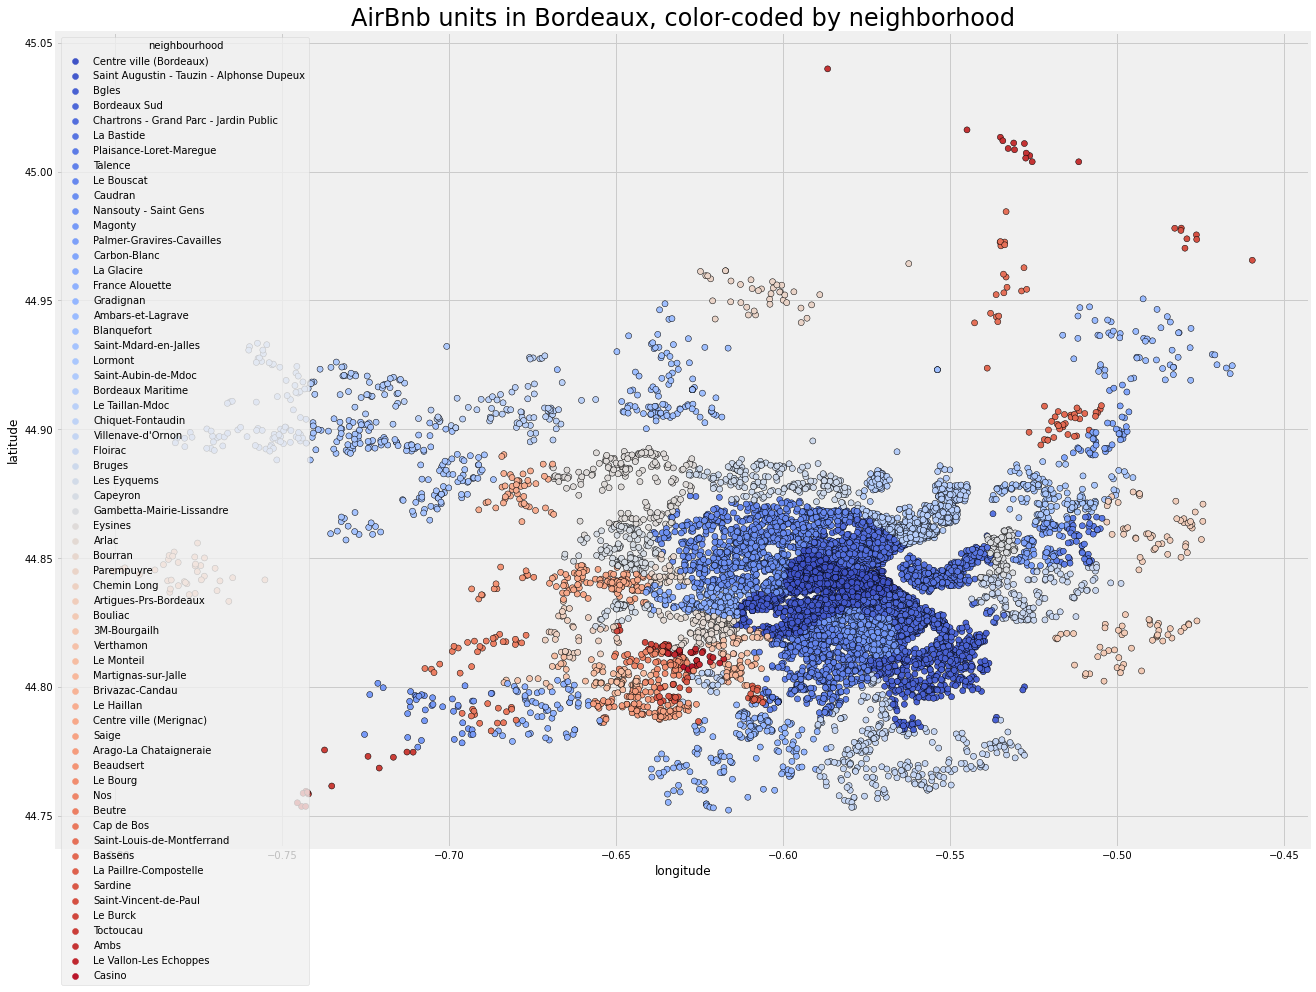

In [55]:
title = 'AirBnb units in Bordeaux, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_bordeaux_unique.longitude, master_df_bordeaux_unique.latitude, hue = master_df_bordeaux_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_bordeaux.png')
plt.show()


## Brussels

In [56]:
files_brussels

['brussels/Brussels_2021-08.csv',
 'brussels/Brussels_2021-09.csv',
 'brussels/Brussels_2020-12.csv',
 'brussels/Brussels_2021-02.csv',
 'brussels/Brussels_2021-03.csv',
 'brussels/Brussels_2021-01.csv',
 'brussels/Brussels_2021-10.csv',
 'brussels/Brussels_2021-04.csv',
 'brussels/Brussels_2021-07.csv',
 'brussels/Brussels_2021-06.csv']

In [57]:
brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(brussels_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(brussels_raw_df_12_12_2020['price'].mean(),2)}.")

brussels_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(brussels_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_1_9_2021['price'].mean(),2)}.")

brussels_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(brussels_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_2_8_2021['price'].mean(),2)}.")

brussels_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(brussels_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_3_4_2021['price'].mean(),2)}.")

brussels_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(brussels_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_4_9_2021['price'].mean(),2)}.")

#brussels_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(brussels_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_5_19_2021['price'].mean(),2)}.")

brussels_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(brussels_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_6_3_2021['price'].mean(),2)}.")

brussels_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(brussels_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_7_4_2021['price'].mean(),2)}.")

brussels_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(brussels_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_8_6_2021['price'].mean(),2)}.")

brussels_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(brussels_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_9_7_2021['price'].mean(),2)}.")

brussels_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(brussels_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_10_6_2021['price'].mean(),2)}.")

#brussels_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(brussels_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 5614 AirBnb listings; the avg price is €82.81.
The 1_9_2021 dataset contains 5557 AirBnb listings; the avg price is €77.53.
The 2_8_2021 dataset contains 5507 AirBnb listings; the avg price is €79.5.
The 3_4_2021 dataset contains 5453 AirBnb listings; the avg price is €79.04.
The 4_9_2021 dataset contains 5537 AirBnb listings; the avg price is €79.75.
The 6_3_2021 dataset contains 5642 AirBnb listings; the avg price is €84.2.
The 7_4_2021 dataset contains 5718 AirBnb listings; the avg price is €83.65.
The 8_6_2021 dataset contains 5531 AirBnb listings; the avg price is €85.18.
The 9_7_2021 dataset contains 5443 AirBnb listings; the avg price is €87.12.
The 10_6_2021 dataset contains 5336 AirBnb listings; the avg price is €90.94.


In [58]:
df_list_brussels = [brussels_raw_df_12_12_2020, brussels_raw_df_1_9_2021, brussels_raw_df_2_8_2021,
           brussels_raw_df_3_4_2021, brussels_raw_df_4_9_2021, brussels_raw_df_6_3_2021, brussels_raw_df_7_4_2021,
           brussels_raw_df_8_6_2021, brussels_raw_df_9_7_2021, brussels_raw_df_10_6_2021]

dates_brussels = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_brussels = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_brussels = []

def airbnb_parse(df_list, files):
    for file in files_brussels:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_{file}.csv")
        print(f"The {file} brussels dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame(df_list, dates):
    for file in files_brussels:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_brussels.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_brussels)

In [59]:
brussels_parse = airbnb_parse(df_list_brussels, files_brussels)
brussels_parse

The 2020-12 brussels dataset contains 5614 AirBnb listings -- the avg price is €82.81.
The 2021-01 brussels dataset contains 5557 AirBnb listings -- the avg price is €77.53.
The 2021-02 brussels dataset contains 5507 AirBnb listings -- the avg price is €79.5.
The 2021-03 brussels dataset contains 5453 AirBnb listings -- the avg price is €79.04.
The 2021-04 brussels dataset contains 5537 AirBnb listings -- the avg price is €79.75.
The 2021-06 brussels dataset contains 5642 AirBnb listings -- the avg price is €84.2.
The 2021-07 brussels dataset contains 5718 AirBnb listings -- the avg price is €83.65.
The 2021-08 brussels dataset contains 5531 AirBnb listings -- the avg price is €85.18.
The 2021-09 brussels dataset contains 5443 AirBnb listings -- the avg price is €87.12.
The 2021-10 brussels dataset contains 5336 AirBnb listings -- the avg price is €90.94.


In [60]:
brussels_summary = airbnb_to_frame(df_list_brussels, files_brussels)
brussels_summary['Date of scrape'] = pd.to_datetime(brussels_summary['Date of scrape'])
brussels_summary['City'] = 'brussels'
brussels_summary

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01           5614      82.81          60.0          0   
1     2021-01-01           5557      77.53          60.0          0   
2     2021-02-01           5507      79.50          60.0          0   
3     2021-03-01           5453      79.04          60.0          0   
4     2021-04-01           5537      79.75          60.0          0   
5     2021-06-01           5642      84.20          60.0          0   
6     2021-07-01           5718      83.65          60.0          0   
7     2021-08-01           5531      85.18          65.0          0   
8     2021-09-01           5443      87.12          65.0          0   
9     2021-10-01           5336      90.94          67.0          0   

   Max Price  Avg reviews per month      City  
0       5000                   1.32  brussels  
1       5000                   1.26  brussels  
2       5000                   1.23  brussels  
3       5000                   1.22  brussels  
4       5000                   1.19  brussels  
5       8200                   1.21  brussels  
6       5000                   1.24  brussels  
7       5000                   1.31  brussels  
8       5000                   1.37  brussels  
9       5000                   1.39  brussels

In [61]:
master_df_brussels = pd.concat(df_list_brussels)
master_df_brussels_unique = master_df_brussels.drop_duplicates(subset='id')
master_df_brussels_unique.head()

id                                               name  host_id  \
0   2352  Triplex-2chmbrs,grande sdb,terrasse= tous confort     2582   
1   2354                COURT/Long- 1chmb+1salon+sdd+terras     2582   
2  45145                       B&B Welcome to my place -  2   199370   
3  48180                Top Apart/location 0 default 2rooms   219560   
4  52796                 Bright apartment in Ixelles/Louise   244722   

  host_name  neighbourhood_group         neighbourhood  latitude  longitude  \
0       Oda                  NaN  Molenbeek-Saint-Jean  50.85787    4.30809   
1       Oda                  NaN  Molenbeek-Saint-Jean  50.85697    4.30651   
2     Erick                  NaN             Bruxelles  50.85181    4.36801   
3     Ahmet                  NaN   Woluwe-Saint-Pierre  50.83821    4.40683   
4    Pierre                  NaN               Ixelles  50.83356    4.36027   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     93               2                 16  2020-07-12   
1  Entire home/apt     74               2                  2  2018-10-28   
2       Hotel room    120               1                  3  2019-04-08   
3  Entire home/apt    200               2                  0         NaN   
4  Entire home/apt     74               5                105  2020-02-28   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.20                               2               179   
1               0.04                               2               337   
2               0.02                               2               227   
3                NaN                               1               365   
4               0.87                               1               363   

   number_of_reviews_ltm  license  
0                    NaN      NaN  
1                    NaN      NaN  
2                    NaN      NaN  
3                    NaN      NaN  
4                    NaN      NaN

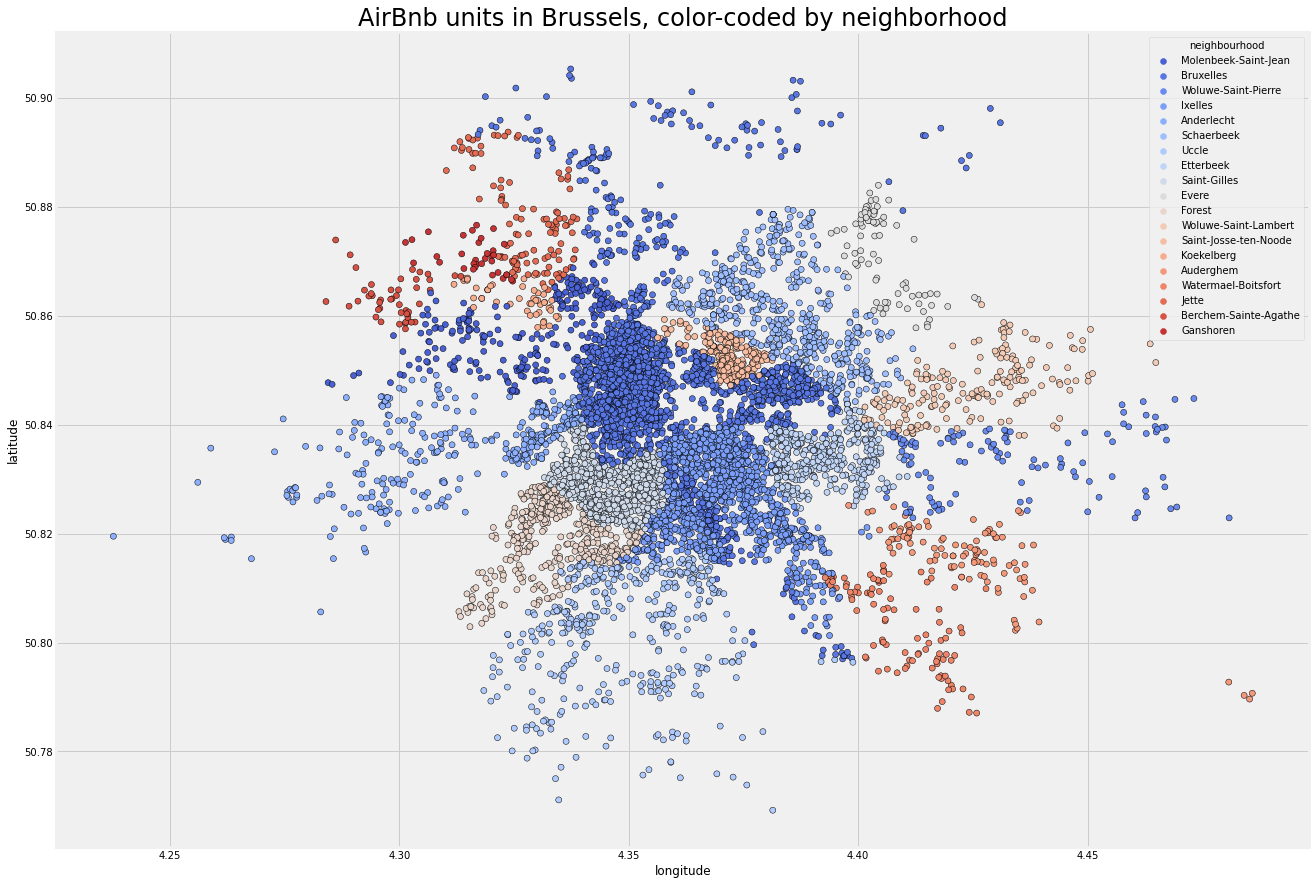

In [62]:
title = 'AirBnb units in Brussels, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("coolwarm")
sns.scatterplot(master_df_brussels_unique.longitude, master_df_brussels_unique.latitude, hue = master_df_brussels_unique.neighbourhood, palette='coolwarm', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_brussels.png')
plt.show()


In [66]:
list_of_summary_dfs = [amsterdam_summary, athens_summary, antwerp_summary,
                      barcelona_summary, brussels_summary, bordeaux_summary]
master_summary = pd.concat(list_of_summary_dfs)

In [68]:
master_summary.head()

Date of scrape  # of Listings  Avg Price  Median Price  Min Price  \
0     2020-12-01          18522     154.00         128.0          0   
1     2021-01-01          18395     152.58         126.0          0   
2     2021-02-01          18291     153.06         128.0          0   
3     2021-03-01          18201     153.72         129.0          0   
4     2021-04-01          17825     154.50         129.0          0   

   Max Price  Avg reviews per month       City  
0       8000                   0.64  Amsterdam  
1       8000                   0.61  Amsterdam  
2       8000                   0.59  Amsterdam  
3       8000                   0.58  Amsterdam  
4       8000                   0.56  Amsterdam

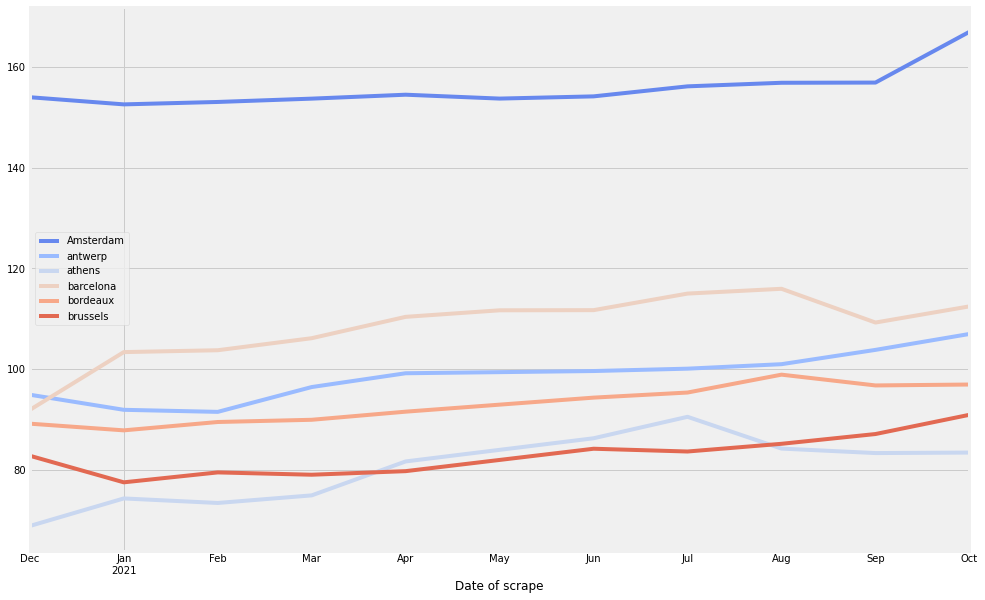

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

for key, grp in master_summary.groupby(['City']):
    ax = grp.plot(ax=ax, kind='line', x='Date of scrape', y='Avg Price', label=key)

plt.legend(loc='best')
plt.show()